![](https://assets.datacamp.com/production/course_723/shields/thumb/shield_image_course_723_20190828-1-1qucbk7?1567003204)
# Introduction and Exproling Raw data

An overview of the process of data cleaning with R and the basics of exploring raw data.

## Introduction to Cleaning Data in R

The Essential Parts of a Data Cleaning Process
--------------------------------------------------

1. Exploring raw data
2. Tidying data
3. Preparing data for analysis

>  No one likes missing data, but it is dangerous to assume that it can simply be removed or replaced. Sometimes missing data tells us something important about whatever it is that we're measuring (i.e. the value of the variable that is missing may be related to - the reason it is missing). Such data is called Missing not at Random, or MNAR.

We are presented with a messy, real-world dataset containing an entire year's worth of weather data from Boston, USA. Among other things, we'll be presented with variables that contain column names, column names that should be values, numbers coded as character strings, and values that are missing, extreme, and downright erroneous!

## Exploring raw data

### Getting a feel for your data

In [34]:
library(readr)
library(dplyr)
library(lubridate)
library(stringr)
library(installr)

Warning message:
"package 'stringr' was built under R version 3.6.3"Warning message:
"package 'installr' was built under R version 3.6.3"
Welcome to installr version 0.22.0

More information is available on the installr project website:
https://github.com/talgalili/installr/

Contact: <tal.galili@gmail.com>
Suggestions and bug-reports can be submitted at: https://github.com/talgalili/installr/issues

			To suppress this message use:
			suppressPackageStartupMessages(library(installr))



In [2]:
weather = readRDS(gzcon(url('https://assets.datacamp.com/production/repositories/34/datasets/b3c1036d9a60a9dfe0f99051d2474a54f76055ea/weather.rds')))

In [3]:
class(weather)

[1] "data.frame"

In [4]:
head(weather)

X year month measure           X1 X2 X3 X4 X5 X6 ... X22 X23 X24 X25 X26 X27
1 1 2014 12    Max.TemperatureF  64 42 51 43 42 45 ... 44  47  46  59  50  52 
2 2 2014 12    Mean.TemperatureF 52 38 44 37 34 42 ... 39  45  44  52  44  45 
3 3 2014 12    Min.TemperatureF  39 33 37 30 26 38 ... 33  42  41  44  37  38 
4 4 2014 12    Max.Dew.PointF    46 40 49 24 37 45 ... 39  45  46  58  31  34 
5 5 2014 12    MeanDew.PointF    40 27 42 21 25 40 ... 34  42  44  43  29  31 
6 6 2014 12    Min.DewpointF     26 17 24 13 12 36 ... 25  37  41  29  28  29 
  X28 X29 X30 X31
1 52  41  30  30 
2 46  36  26  25 
3 40  30  22  20 
4 42  26  10  8  
5 35  20  4   5  
6 27  10  -6  1

In [5]:
tail(weather)

X   year month measure            X1   X2 X3 X4 X5 X6 ... X22 X23 X24 X25
281 281 2015 12    Mean.Wind.SpeedMPH 6    NA NA NA NA NA ... NA  NA  NA  NA 
282 282 2015 12    Max.Gust.SpeedMPH  17   NA NA NA NA NA ... NA  NA  NA  NA 
283 283 2015 12    PrecipitationIn    0.14 NA NA NA NA NA ... NA  NA  NA  NA 
284 284 2015 12    CloudCover         7    NA NA NA NA NA ... NA  NA  NA  NA 
285 285 2015 12    Events             Rain NA NA NA NA NA ... NA  NA  NA  NA 
286 286 2015 12    WindDirDegrees     109  NA NA NA NA NA ... NA  NA  NA  NA 
    X26 X27 X28 X29 X30 X31
281 NA  NA  NA  NA  NA  NA 
282 NA  NA  NA  NA  NA  NA 
283 NA  NA  NA  NA  NA  NA 
284 NA  NA  NA  NA  NA  NA 
285 NA  NA  NA  NA  NA  NA 
286 NA  NA  NA  NA  NA  NA

In [6]:
str(weather)

'data.frame':	286 obs. of  35 variables:
 $ X      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ year   : int  2014 2014 2014 2014 2014 2014 2014 2014 2014 2014 ...
 $ month  : int  12 12 12 12 12 12 12 12 12 12 ...
 $ measure: chr  "Max.TemperatureF" "Mean.TemperatureF" "Min.TemperatureF" "Max.Dew.PointF" ...
 $ X1     : chr  "64" "52" "39" "46" ...
 $ X2     : chr  "42" "38" "33" "40" ...
 $ X3     : chr  "51" "44" "37" "49" ...
 $ X4     : chr  "43" "37" "30" "24" ...
 $ X5     : chr  "42" "34" "26" "37" ...
 $ X6     : chr  "45" "42" "38" "45" ...
 $ X7     : chr  "38" "30" "21" "36" ...
 $ X8     : chr  "29" "24" "18" "28" ...
 $ X9     : chr  "49" "39" "29" "49" ...
 $ X10    : chr  "48" "43" "38" "45" ...
 $ X11    : chr  "39" "36" "32" "37" ...
 $ X12    : chr  "39" "35" "31" "28" ...
 $ X13    : chr  "42" "37" "32" "28" ...
 $ X14    : chr  "45" "39" "33" "29" ...
 $ X15    : chr  "42" "37" "32" "33" ...
 $ X16    : chr  "44" "40" "35" "42" ...
 $ X17    : chr  "49" "45" "41" "46" ...
 $

In [7]:
dim(weather)

[1] 286  35

In [8]:
bmi=read_csv('https://assets.datacamp.com/production/repositories/34/datasets/a0a569ebbb34500d11979eba95360125127e6434/bmi_clean.csv')

Parsed with column specification:
cols(
  .default = col_double(),
  Country = col_character()
)
See spec(...) for full column specifications.


In [9]:
class(bmi)

[1] "spec_tbl_df" "tbl_df"      "tbl"         "data.frame"

In [10]:
dim(bmi)

[1] 199  30

In [11]:
head(bmi)

Country             Y1980    Y1981    Y1982    Y1983    Y1984    Y1985   
1 Afghanistan         21.48678 21.46552 21.45145 21.43822 21.42734 21.41222
2 Albania             25.22533 25.23981 25.25636 25.27176 25.27901 25.28669
3 Algeria             22.25703 22.34745 22.43647 22.52105 22.60633 22.69501
4 Andorra             25.66652 25.70868 25.74681 25.78250 25.81874 25.85236
5 Angola              20.94876 20.94371 20.93754 20.93187 20.93569 20.94857
6 Antigua and Barbuda 23.31424 23.39054 23.45883 23.53735 23.63584 23.73109
  Y1986    Y1987    Y1988    ... Y1999    Y2000    Y2001    Y2002    Y2003   
1 21.40132 21.37679 21.34018 ... 20.75469 20.69521 20.62643 20.59848 20.58706
2 25.29451 25.30217 25.30450 ... 25.46555 25.55835 25.66701 25.77167 25.87274
3 22.76979 22.84096 22.90644 ... 23.69486 23.77659 23.86256 23.95294 24.05243
4 25.89089 25.93414 25.98477 ... 26.75078 26.83179 26.92373 27.02525 27.12481
5 20.96030 20.98025 21.01375 ... 21.31954 21.37480 21.43664 21.51765 21.59924
6 23.83449 23.93649 24.05364 ... 24.91721 24.99158 25.05857 25.13039 25.20713
  Y2004    Y2005    Y2006    Y2007    Y2008   
1 20.57759 20.58084 20.58749 20.60246 20.62058
2 25.98136 26.08939 26.20867 26.32753 26.44657
3 24.15957 24.27001 24.38270 24.48846 24.59620
4 27.23107 27.32827 27.43588 27.53363 27.63048
5 21.69218 21.80564 21.93881 22.08962 22.25083
6 25.29898 25.39965 25.51382 25.64247 25.76602

In [12]:
tail(bmi)

Country            Y1980    Y1981    Y1982    Y1983    Y1984    Y1985   
1 Venezuela          24.58052 24.69666 24.80082 24.89208 24.98440 25.07104
2 Vietnam            19.01394 19.03902 19.06804 19.09675 19.13046 19.16397
3 West Bank and Gaza 24.31624 24.40192 24.48713 24.57107 24.65582 24.74148
4 Yemen, Rep.        22.90384 22.96813 23.02669 23.07279 23.12566 23.16944
5 Zambia             19.66295 19.69512 19.72538 19.75420 19.78070 19.80335
6 Zimbabwe           21.46989 21.48867 21.50738 21.52936 21.53383 21.54341
  Y1986    Y1987    Y1988    ... Y1999    Y2000    Y2001    Y2002    Y2003   
1 25.15587 25.24624 25.35274 ... 26.50035 26.61021 26.71688 26.79210 26.85498
2 19.19740 19.23481 19.27090 ... 20.02081 20.10343 20.18623 20.27145 20.36402
3 24.82984 24.91615 25.00108 ... 26.28240 26.39074 26.45700 26.48925 26.51152
4 23.20933 23.25043 23.29401 ... 23.85482 23.92467 23.99129 24.05692 24.12459
5 19.82396 19.85065 19.88320 ... 20.15094 20.17261 20.20266 20.24298 20.29474
6 21.54859 21.54590 21.55396 ... 21.68873 21.72652 21.76514 21.79645 21.82499
  Y2004    Y2005    Y2006    Y2007    Y2008   
1 26.95162 27.05633 27.17698 27.30849 27.44500
2 20.46585 20.57277 20.68655 20.80189 20.91630
3 26.52924 26.54329 26.54449 26.55460 26.57750
4 24.19204 24.25638 24.32120 24.37949 24.44157
5 20.35966 20.43398 20.51422 20.59770 20.68321
6 21.85806 21.89495 21.93371 21.97405 22.02660

In [13]:
str(bmi)

tibble [199 x 30] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Country: chr [1:199] "Afghanistan" "Albania" "Algeria" "Andorra" ...
 $ Y1980  : num [1:199] 21.5 25.2 22.3 25.7 20.9 ...
 $ Y1981  : num [1:199] 21.5 25.2 22.3 25.7 20.9 ...
 $ Y1982  : num [1:199] 21.5 25.3 22.4 25.7 20.9 ...
 $ Y1983  : num [1:199] 21.4 25.3 22.5 25.8 20.9 ...
 $ Y1984  : num [1:199] 21.4 25.3 22.6 25.8 20.9 ...
 $ Y1985  : num [1:199] 21.4 25.3 22.7 25.9 20.9 ...
 $ Y1986  : num [1:199] 21.4 25.3 22.8 25.9 21 ...
 $ Y1987  : num [1:199] 21.4 25.3 22.8 25.9 21 ...
 $ Y1988  : num [1:199] 21.3 25.3 22.9 26 21 ...
 $ Y1989  : num [1:199] 21.3 25.3 23 26 21.1 ...
 $ Y1990  : num [1:199] 21.2 25.3 23 26.1 21.1 ...
 $ Y1991  : num [1:199] 21.2 25.3 23.1 26.2 21.1 ...
 $ Y1992  : num [1:199] 21.1 25.2 23.2 26.2 21.1 ...
 $ Y1993  : num [1:199] 21.1 25.2 23.3 26.3 21.1 ...
 $ Y1994  : num [1:199] 21 25.2 23.3 26.4 21.1 ...
 $ Y1995  : num [1:199] 20.9 25.3 23.4 26.4 21.2 ...
 $ Y1996  : num [1:199] 20.9 25.3 23.5

In [14]:
glimpse(bmi)

Rows: 199
Columns: 30
$ Country <chr> "Afghanistan", "Albania", "Algeria", "Andorra", "Angola", "...
$ Y1980   <dbl> 21.48678, 25.22533, 22.25703, 25.66652, 20.94876, 23.31424,...
$ Y1981   <dbl> 21.46552, 25.23981, 22.34745, 25.70868, 20.94371, 23.39054,...
$ Y1982   <dbl> 21.45145, 25.25636, 22.43647, 25.74681, 20.93754, 23.45883,...
$ Y1983   <dbl> 21.43822, 25.27176, 22.52105, 25.78250, 20.93187, 23.53735,...
$ Y1984   <dbl> 21.42734, 25.27901, 22.60633, 25.81874, 20.93569, 23.63584,...
$ Y1985   <dbl> 21.41222, 25.28669, 22.69501, 25.85236, 20.94857, 23.73109,...
$ Y1986   <dbl> 21.40132, 25.29451, 22.76979, 25.89089, 20.96030, 23.83449,...
$ Y1987   <dbl> 21.37679, 25.30217, 22.84096, 25.93414, 20.98025, 23.93649,...
$ Y1988   <dbl> 21.34018, 25.30450, 22.90644, 25.98477, 21.01375, 24.05364,...
$ Y1989   <dbl> 21.29845, 25.31944, 22.97931, 26.04450, 21.05269, 24.16347,...
$ Y1990   <dbl> 21.24818, 25.32357, 23.04600, 26.10936, 21.09007, 24.26782,...
$ Y1991   <dbl> 21.20269, 25.2

In [15]:
# View the first 6 rows
head(bmi, n=6)

# View the first 15 rows
head(bmi, n=15)

# View the last 6 rows
tail(bmi, n=6)

# View the last 10 rows
tail(bmi, n=10)

Country             Y1980    Y1981    Y1982    Y1983    Y1984    Y1985   
1 Afghanistan         21.48678 21.46552 21.45145 21.43822 21.42734 21.41222
2 Albania             25.22533 25.23981 25.25636 25.27176 25.27901 25.28669
3 Algeria             22.25703 22.34745 22.43647 22.52105 22.60633 22.69501
4 Andorra             25.66652 25.70868 25.74681 25.78250 25.81874 25.85236
5 Angola              20.94876 20.94371 20.93754 20.93187 20.93569 20.94857
6 Antigua and Barbuda 23.31424 23.39054 23.45883 23.53735 23.63584 23.73109
  Y1986    Y1987    Y1988    ... Y1999    Y2000    Y2001    Y2002    Y2003   
1 21.40132 21.37679 21.34018 ... 20.75469 20.69521 20.62643 20.59848 20.58706
2 25.29451 25.30217 25.30450 ... 25.46555 25.55835 25.66701 25.77167 25.87274
3 22.76979 22.84096 22.90644 ... 23.69486 23.77659 23.86256 23.95294 24.05243
4 25.89089 25.93414 25.98477 ... 26.75078 26.83179 26.92373 27.02525 27.12481
5 20.96030 20.98025 21.01375 ... 21.31954 21.37480 21.43664 21.51765 21.59924
6 23.83449 23.93649 24.05364 ... 24.91721 24.99158 25.05857 25.13039 25.20713
  Y2004    Y2005    Y2006    Y2007    Y2008   
1 20.57759 20.58084 20.58749 20.60246 20.62058
2 25.98136 26.08939 26.20867 26.32753 26.44657
3 24.15957 24.27001 24.38270 24.48846 24.59620
4 27.23107 27.32827 27.43588 27.53363 27.63048
5 21.69218 21.80564 21.93881 22.08962 22.25083
6 25.29898 25.39965 25.51382 25.64247 25.76602

Country             Y1980    Y1981    Y1982    Y1983    Y1984    Y1985   
1  Afghanistan         21.48678 21.46552 21.45145 21.43822 21.42734 21.41222
2  Albania             25.22533 25.23981 25.25636 25.27176 25.27901 25.28669
3  Algeria             22.25703 22.34745 22.43647 22.52105 22.60633 22.69501
4  Andorra             25.66652 25.70868 25.74681 25.78250 25.81874 25.85236
5  Angola              20.94876 20.94371 20.93754 20.93187 20.93569 20.94857
6  Antigua and Barbuda 23.31424 23.39054 23.45883 23.53735 23.63584 23.73109
7  Argentina           25.37913 25.44951 25.50242 25.55644 25.61271 25.66593
8  Armenia             23.82469 23.86401 23.91023 23.95649 24.00181 24.04083
9  Australia           24.92729 25.00216 25.07660 25.14938 25.22894 25.31849
10 Austria             24.84097 24.88110 24.93482 24.98118 25.02208 25.06015
11 Azerbaijan          24.49375 24.52584 24.56064 24.60150 24.64121 24.67566
12 Bahamas             24.21064 24.30814 24.42750 24.54415 24.66558 24.78408
13 Bahrain             23.97588 24.09045 24.20617 24.32335 24.43174 24.53684
14 Bangladesh          20.51918 20.47766 20.43741 20.40075 20.36524 20.32983
15 Barbados            24.36372 24.43455 24.49314 24.54713 24.59913 24.64998
   Y1986    Y1987    Y1988    ... Y1999    Y2000    Y2001    Y2002    Y2003   
1  21.40132 21.37679 21.34018 ... 20.75469 20.69521 20.62643 20.59848 20.58706
2  25.29451 25.30217 25.30450 ... 25.46555 25.55835 25.66701 25.77167 25.87274
3  22.76979 22.84096 22.90644 ... 23.69486 23.77659 23.86256 23.95294 24.05243
4  25.89089 25.93414 25.98477 ... 26.75078 26.83179 26.92373 27.02525 27.12481
5  20.96030 20.98025 21.01375 ... 21.31954 21.37480 21.43664 21.51765 21.59924
6  23.83449 23.93649 24.05364 ... 24.91721 24.99158 25.05857 25.13039 25.20713
7  25.72364 25.78529 25.84428 ... 26.79005 26.88103 26.96067 26.99882 27.04738
8  24.08736 24.13334 24.17219 ... 24.11699 24.18045 24.26670 24.37698 24.50332
9  25.41017 25.50528 25.60001 ... 26.65506 26.74486 26.84397 26.93858 27.03801
10 25.10680 25.14747 25.19333 ... 25.81773 25.87471 25.93806 25.99583 26.06356
11 24.71906 24.75799 24.78894 ... 24.47842 24.51287 24.57202 24.66021 24.77164
12 24.90724 25.03166 25.14778 ... 26.12080 26.25748 26.38653 26.51184 26.62607
13 24.63328 24.74914 24.86604 ... 26.50245 26.65409 26.80388 26.94923 27.09298
14 20.29654 20.26401 20.23497 ... 20.13361 20.14774 20.16802 20.18621 20.20948
15 24.71728 24.77976 24.84265 ... 25.51681 25.60292 25.68910 25.77615 25.87020
   Y2004    Y2005    Y2006    Y2007    Y2008   
1  20.57759 20.58084 20.58749 20.60246 20.62058
2  25.98136 26.08939 26.20867 26.32753 26.44657
3  24.15957 24.27001 24.38270 24.48846 24.59620
4  27.23107 27.32827 27.43588 27.53363 27.63048
5  21.69218 21.80564 21.93881 22.08962 22.25083
6  25.29898 25.39965 25.51382 25.64247 25.76602
7  27.11001 27.18941 27.28179 27.38889 27.50170
8  24.64178 24.81447 24.99160 25.17590 25.35542
9  27.13871 27.24614 27.35267 27.45878 27.56373
10 26.14360 26.21107 26.29374 26.38136 26.46741
11 24.89376 25.06256 25.25706 25.45513 25.65117
12 26.75612 26.88517 27.00715 27.12653 27.24594
13 27.23908 27.38693 27.53868 27.68865 27.83721
14 20.23957 20.27648 20.31554 20.35493 20.39742
15 25.95660 26.06074 26.16874 26.27575 26.38439

Country            Y1980    Y1981    Y1982    Y1983    Y1984    Y1985   
1 Venezuela          24.58052 24.69666 24.80082 24.89208 24.98440 25.07104
2 Vietnam            19.01394 19.03902 19.06804 19.09675 19.13046 19.16397
3 West Bank and Gaza 24.31624 24.40192 24.48713 24.57107 24.65582 24.74148
4 Yemen, Rep.        22.90384 22.96813 23.02669 23.07279 23.12566 23.16944
5 Zambia             19.66295 19.69512 19.72538 19.75420 19.78070 19.80335
6 Zimbabwe           21.46989 21.48867 21.50738 21.52936 21.53383 21.54341
  Y1986    Y1987    Y1988    ... Y1999    Y2000    Y2001    Y2002    Y2003   
1 25.15587 25.24624 25.35274 ... 26.50035 26.61021 26.71688 26.79210 26.85498
2 19.19740 19.23481 19.27090 ... 20.02081 20.10343 20.18623 20.27145 20.36402
3 24.82984 24.91615 25.00108 ... 26.28240 26.39074 26.45700 26.48925 26.51152
4 23.20933 23.25043 23.29401 ... 23.85482 23.92467 23.99129 24.05692 24.12459
5 19.82396 19.85065 19.88320 ... 20.15094 20.17261 20.20266 20.24298 20.29474
6 21.54859 21.54590 21.55396 ... 21.68873 21.72652 21.76514 21.79645 21.82499
  Y2004    Y2005    Y2006    Y2007    Y2008   
1 26.95162 27.05633 27.17698 27.30849 27.44500
2 20.46585 20.57277 20.68655 20.80189 20.91630
3 26.52924 26.54329 26.54449 26.55460 26.57750
4 24.19204 24.25638 24.32120 24.37949 24.44157
5 20.35966 20.43398 20.51422 20.59770 20.68321
6 21.85806 21.89495 21.93371 21.97405 22.02660

Country            Y1980    Y1981    Y1982    Y1983    Y1984    Y1985   
1  United States      25.46406 25.57524 25.67883 25.78812 25.90690 26.02568
2  Uruguay            24.24001 24.31948 24.39260 24.44209 24.49525 24.54516
3  Uzbekistan         24.56500 24.60077 24.62187 24.64780 24.66890 24.69832
4  Vanuatu            23.20701 23.32990 23.46016 23.60431 23.75134 23.89466
5  Venezuela          24.58052 24.69666 24.80082 24.89208 24.98440 25.07104
6  Vietnam            19.01394 19.03902 19.06804 19.09675 19.13046 19.16397
7  West Bank and Gaza 24.31624 24.40192 24.48713 24.57107 24.65582 24.74148
8  Yemen, Rep.        22.90384 22.96813 23.02669 23.07279 23.12566 23.16944
9  Zambia             19.66295 19.69512 19.72538 19.75420 19.78070 19.80335
10 Zimbabwe           21.46989 21.48867 21.50738 21.52936 21.53383 21.54341
   Y1986    Y1987    Y1988    ... Y1999    Y2000    Y2001    Y2002    Y2003   
1  26.13740 26.25939 26.37687 ... 27.60386 27.71039 27.80569 27.90479 28.00041
2  24.59804 24.67024 24.73972 ... 25.78625 25.86898 25.93469 25.96627 26.00585
3  24.72305 24.74603 24.77115 ... 24.72082 24.75326 24.79418 24.83998 24.88965
4  24.03171 24.15571 24.27529 ... 25.72398 25.85208 25.96032 26.05661 26.16060
5  25.15587 25.24624 25.35274 ... 26.50035 26.61021 26.71688 26.79210 26.85498
6  19.19740 19.23481 19.27090 ... 20.02081 20.10343 20.18623 20.27145 20.36402
7  24.82984 24.91615 25.00108 ... 26.28240 26.39074 26.45700 26.48925 26.51152
8  23.20933 23.25043 23.29401 ... 23.85482 23.92467 23.99129 24.05692 24.12459
9  19.82396 19.85065 19.88320 ... 20.15094 20.17261 20.20266 20.24298 20.29474
10 21.54859 21.54590 21.55396 ... 21.68873 21.72652 21.76514 21.79645 21.82499
   Y2004    Y2005    Y2006    Y2007    Y2008   
1  28.10039 28.19703 28.28959 28.37574 28.45698
2  26.06073 26.13136 26.20624 26.29256 26.39123
3  24.95455 25.03331 25.12717 25.22226 25.32054
4  26.27087 26.38887 26.51376 26.64903 26.78926
5  26.95162 27.05633 27.17698 27.30849 27.44500
6  20.46585 20.57277 20.68655 20.80189 20.91630
7  26.52924 26.54329 26.54449 26.55460 26.57750
8  24.19204 24.25638 24.32120 24.37949 24.44157
9  20.35966 20.43398 20.51422 20.59770 20.68321
10 21.85806 21.89495 21.93371 21.97405 22.02660

### Visualizing data

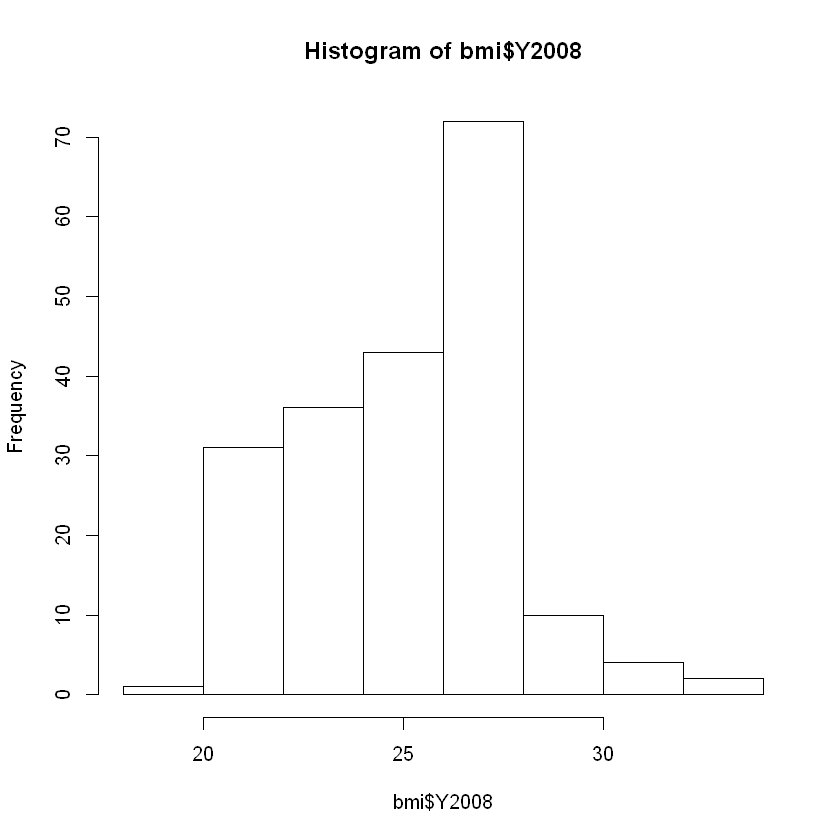

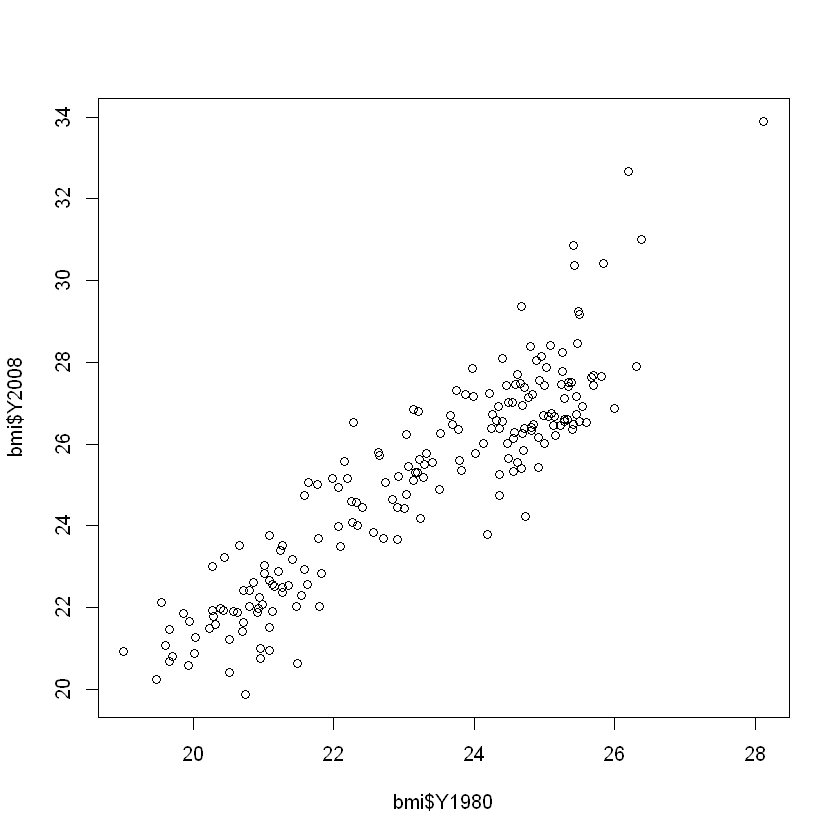

In [16]:
# Histogram of BMIs from 2008
hist(bmi$Y2008)

# Scatter plot comparing BMIs from 1980 to those from 2008
plot(bmi$Y1980, bmi$Y2008)

# Tidying data
 an overview of the principles of tidy data, how to identify messy data, and what to do about it.
 
## Introduction to tidy data

in `bmi`, All of the year column names could be expressed as values of a new variable called `year`.

### Gathering columns into key-value pairs

The most important function in tidyr is `gather()`. It should be used when you have columns that are not variables and you want to collapse them into key-value pairs.

The easiest way to visualize the effect of `gather()` is that it makes wide datasets long. Running the following command on `wide_df` will make it long:
```python
gather(wide_df, my_key, my_val, -col)
```

### Spreading key-value pairs into columns

The opposite of `gather()` is `spread()`, which takes key-values pairs and spreads them across multiple columns. This is useful when values in a column should actually be column names (i.e. variables). It can also make data more compact and easier to read.

The easiest way to visualize the effect of spread() is that it makes long datasets wide. As you saw in the video, running the following command will make long_df wide:
```python
spread(long_df, my_key, my_val)
```

### Separating columns

The `separate()` function allows you to separate one column into multiple columns. Unless you tell it otherwise, it will attempt to separate on any character that is not a letter or number. You can also specify a specific separator using the sep argument.

treatments dataset obeys the principles of tidy data, but we'd like to split the treatment dates into two separate columns: year and month. This can be accomplished with the following:
```python
separate(treatments, year_mo, c("year", "month"))
```

### Uniting columns

The opposite of separate() is unite(), which takes multiple columns and pastes them together. By default, the contents of the columns will be separated by underscores in the new column, but this behavior can be altered via the sep argument.

treatments but this time the `year_mo` column has been separated into `year` and `month`. The original column can be recreated by putting year and month back together:
```python
unite(treatments, year_mo, year, month)
```

### Column headers are values, not variable names

You saw earlier, how we sometimes come across datasets where column names are actually values of a variable (e.g. months of the year). This is often the case when working with repeated measures data, where measurements are taken on subjects of interest on multiple occasions over time. The `gather()` function is helpful in these situations.

### Variables are stored in both rows and columns

Sometimes you'll run into situations where variables are stored in both rows and columns. Although it may not be immediately obvious, if we treat the values in the type column as variables and create a separate column for each of them, we can set things straight. To do this, we use the `spread()` function.

### Multiple values are stored in one column

It's also fairly common that you will find two variables stored in a single column of data. These variables may be joined by a separator like a dash, underscore, space, or forward slash.

The `separate(`) function comes in handy in these situations.  Keep in mind that the `into` argument, which specifies the names of the 2 new columns being formed, must be given as a character vector (e.g. ```c("column1", "column2"))```.

# Preparing data for analysis

### Type conversions

Loosely speaking, the `class()` function tells you what type of object you're working with. (There are subtle differences between the `class`, `type`, and `mode` of an object, 

In [24]:
# Make this evaluate to "character"
class(as.character(TRUE))

# Make this evaluate to "numeric"
class(as.numeric("8484.00"))

# Make this evaluate to "integer"
class(as.integer(99L))

# Make this evaluate to "factor"
class(as.factor("factor"))

# Make this evaluate to "logical"
class(as.logical("FALSE"))

[1] "character"

[1] "numeric"

[1] "integer"

[1] "factor"

[1] "logical"

### Common type conversions

It is often necessary to change, or coerce, the way that variables in a dataset are stored. 

This could be because of the way they were read into R (with `read.csv()`, for example) or perhaps the function you are using to analyze the data requires variables to be coded a certain way.

Only certain coercions are allowed, but the rules for what works are generally pretty intuitive. For example, trying to convert a character string to a number gives an error: `as.numeric("some text")`.

There are a few less intuitive results. For example, under the hood, the logical values `TRUE` and `FALSE` are coded as `1` and `0`, respectively. Therefore, `as.logical(1)` returns `TRUE` and `as.numeric(TRUE)` returns `1`.

### Working with dates

Dates can be a challenge to work with in any programming language, but thanks to the lubridate package, working with dates in R isn't so bad. Since this project is about cleaning data, we only cover the most basic functions from lubridate to help us standardize the format of dates and times in our data. these functions combine the letters `y`, `m`, `d`, `h`, `m`, `s`, which stand for year, month, day, hour, minute, and second, respectively. The order of the letters in the function should match the order of the date/time you are attempting to read in, although not all combinations are valid. Notice that the functions are "smart" in that they are capable of parsing multiple formats.

In [26]:
students = read_csv('https://assets.datacamp.com/production/repositories/34/datasets/f75a87dbbdf2cf79e2286f97b2af22146cb717b1/students_with_dates.csv')
head(students)

Warning message:
"Missing column names filled in: 'X1' [1]"Parsed with column specification:
cols(
  .default = col_character(),
  X1 = col_double(),
  dob = col_date(format = ""),
  Medu = col_double(),
  Fedu = col_double(),
  traveltime = col_double(),
  studytime = col_double(),
  failures = col_double(),
  famrel = col_double(),
  freetime = col_double(),
  goout = col_double(),
  Dalc = col_double(),
  Walc = col_double(),
  health = col_double(),
  nurse_visit = col_datetime(format = ""),
  absences = col_double()
)
See spec(...) for full column specifications.


X1 school sex dob        address famsize Pstatus Medu Fedu Mjob     ...
1 1  GP     F   2000-06-05 U       GT3     A       4    4    at_home  ...
2 2  GP     F   1999-11-25 U       GT3     T       1    1    at_home  ...
3 3  GP     F   1998-02-02 U       LE3     T       1    1    at_home  ...
4 4  GP     F   1997-12-20 U       GT3     T       4    2    health   ...
5 5  GP     F   1998-10-04 U       GT3     T       3    3    other    ...
6 6  GP     M   1999-06-16 U       LE3     T       4    3    services ...
  romantic famrel freetime goout Dalc Walc health nurse_visit         absences
1 no       4      3        4     1    1    3      2014-04-10 14:59:54  6      
2 no       5      3        3     1    1    3      2015-03-12 14:59:54  4      
3 no       4      3        2     2    3    3      2015-09-21 14:59:54 10      
4 yes      3      2        2     1    1    5      2015-09-03 14:59:54  2      
5 no       4      3        2     1    2    5      2015-04-07 14:59:54  4      
6 no       5      4        2     1    2    5      2013-11-15 14:59:54 10      
  Grades  
1 5/6/6   
2 5/5/6   
3 7/8/10  
4 15/14/15
5 6/10/10 
6 15/15/15

In [28]:
str(students)

tibble [395 x 33] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ X1         : num [1:395] 1 2 3 4 5 6 7 8 9 10 ...
 $ school     : chr [1:395] "GP" "GP" "GP" "GP" ...
 $ sex        : chr [1:395] "F" "F" "F" "F" ...
 $ dob        : Date[1:395], format: "2000-06-05" "1999-11-25" ...
 $ address    : chr [1:395] "U" "U" "U" "U" ...
 $ famsize    : chr [1:395] "GT3" "GT3" "LE3" "GT3" ...
 $ Pstatus    : chr [1:395] "A" "T" "T" "T" ...
 $ Medu       : num [1:395] 4 1 1 4 3 4 2 4 3 3 ...
 $ Fedu       : num [1:395] 4 1 1 2 3 3 2 4 2 4 ...
 $ Mjob       : chr [1:395] "at_home" "at_home" "at_home" "health" ...
 $ Fjob       : chr [1:395] "teacher" "other" "other" "services" ...
 $ reason     : chr [1:395] "course" "course" "other" "home" ...
 $ guardian   : chr [1:395] "mother" "father" "mother" "mother" ...
 $ traveltime : num [1:395] 2 1 1 1 1 1 1 2 1 1 ...
 $ studytime  : num [1:395] 2 2 2 3 2 2 2 2 2 2 ...
 $ failures   : num [1:395] 0 0 3 0 0 0 0 0 0 0 ...
 $ schoolsup  : chr [1:395] "yes" "no

In [29]:
# Coerce Grades to character
students$Grades <- as.character(students$Grades)

# Coerce Medu to factor
students$Medu <- as.factor(students$Medu)

# Coerce Fedu to factor
students$Fedu <- as.factor(students$Fedu)
    
# Look at students once more with str()
str(students)


tibble [395 x 33] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ X1         : num [1:395] 1 2 3 4 5 6 7 8 9 10 ...
 $ school     : chr [1:395] "GP" "GP" "GP" "GP" ...
 $ sex        : chr [1:395] "F" "F" "F" "F" ...
 $ dob        : Date[1:395], format: "2000-06-05" "1999-11-25" ...
 $ address    : chr [1:395] "U" "U" "U" "U" ...
 $ famsize    : chr [1:395] "GT3" "GT3" "LE3" "GT3" ...
 $ Pstatus    : chr [1:395] "A" "T" "T" "T" ...
 $ Medu       : Factor w/ 5 levels "0","1","2","3",..: 5 2 2 5 4 5 3 5 4 4 ...
 $ Fedu       : Factor w/ 5 levels "0","1","2","3",..: 5 2 2 3 4 4 3 5 3 5 ...
 $ Mjob       : chr [1:395] "at_home" "at_home" "at_home" "health" ...
 $ Fjob       : chr [1:395] "teacher" "other" "other" "services" ...
 $ reason     : chr [1:395] "course" "course" "other" "home" ...
 $ guardian   : chr [1:395] "mother" "father" "mother" "mother" ...
 $ traveltime : num [1:395] 2 1 1 1 1 1 1 2 1 1 ...
 $ studytime  : num [1:395] 2 2 2 3 2 2 2 2 2 2 ...
 $ failures   : num [1:395] 0 0 3 0

In [31]:
# Preview students2 with str()
str(students)

# Parse as date
dmy("17 Sep 2015")

# Parse as date and time (with no seconds!)
mdy_hm("July 15, 2012 12:56")

# Coerce dob to a date (with no time)
students$dob <- ymd(students$dob)

# Coerce nurse_visit to a date and time
students$nurse_visit <- ymd_hms(students$nurse_visit)
    
# Look at students2 once more with str()
str(students)


tibble [395 x 33] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ X1         : num [1:395] 1 2 3 4 5 6 7 8 9 10 ...
 $ school     : chr [1:395] "GP" "GP" "GP" "GP" ...
 $ sex        : chr [1:395] "F" "F" "F" "F" ...
 $ dob        : Date[1:395], format: "2000-06-05" "1999-11-25" ...
 $ address    : chr [1:395] "U" "U" "U" "U" ...
 $ famsize    : chr [1:395] "GT3" "GT3" "LE3" "GT3" ...
 $ Pstatus    : chr [1:395] "A" "T" "T" "T" ...
 $ Medu       : Factor w/ 5 levels "0","1","2","3",..: 5 2 2 5 4 5 3 5 4 4 ...
 $ Fedu       : Factor w/ 5 levels "0","1","2","3",..: 5 2 2 3 4 4 3 5 3 5 ...
 $ Mjob       : chr [1:395] "at_home" "at_home" "at_home" "health" ...
 $ Fjob       : chr [1:395] "teacher" "other" "other" "services" ...
 $ reason     : chr [1:395] "course" "course" "other" "home" ...
 $ guardian   : chr [1:395] "mother" "father" "mother" "mother" ...
 $ traveltime : num [1:395] 2 1 1 1 1 1 1 2 1 1 ...
 $ studytime  : num [1:395] 2 2 2 3 2 2 2 2 2 2 ...
 $ failures   : num [1:395] 0 0 3 0

[1] "2015-09-17"

[1] "2012-07-15 12:56:00 UTC"

tibble [395 x 33] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ X1         : num [1:395] 1 2 3 4 5 6 7 8 9 10 ...
 $ school     : chr [1:395] "GP" "GP" "GP" "GP" ...
 $ sex        : chr [1:395] "F" "F" "F" "F" ...
 $ dob        : Date[1:395], format: "2000-06-05" "1999-11-25" ...
 $ address    : chr [1:395] "U" "U" "U" "U" ...
 $ famsize    : chr [1:395] "GT3" "GT3" "LE3" "GT3" ...
 $ Pstatus    : chr [1:395] "A" "T" "T" "T" ...
 $ Medu       : Factor w/ 5 levels "0","1","2","3",..: 5 2 2 5 4 5 3 5 4 4 ...
 $ Fedu       : Factor w/ 5 levels "0","1","2","3",..: 5 2 2 3 4 4 3 5 3 5 ...
 $ Mjob       : chr [1:395] "at_home" "at_home" "at_home" "health" ...
 $ Fjob       : chr [1:395] "teacher" "other" "other" "services" ...
 $ reason     : chr [1:395] "course" "course" "other" "home" ...
 $ guardian   : chr [1:395] "mother" "father" "mother" "mother" ...
 $ traveltime : num [1:395] 2 1 1 1 1 1 1 2 1 1 ...
 $ studytime  : num [1:395] 2 2 2 3 2 2 2 2 2 2 ...
 $ failures   : num [1:395] 0 0 3 0

## String manipulation
### Trimming and padding strings

One common issue that comes up when cleaning data is the need to remove leading and/or trailing white space. The `str_trim()` function from stringr makes it easy to do this while leaving intact the part of the string that you actually want.
```python
> str_trim("  this is a test     ")
[1] "this is a test"
```

A similar issue is when you need to pad strings to make them a certain number of characters wide. One example is if you had a bunch of employee ID numbers, some of which begin with one or more zeros. When reading these data in, you find that the leading zeros have been dropped somewhere along the way (probably because the variable was thought to be numeric and in that case, leading zeros would be unnecessary.)
```python
> str_pad("24493", width = 7, side = "left", pad = "0")
[1] "0024493"
```

In [36]:
# Load the stringr package
library(stringr)

# Trim all leading and trailing whitespace
str_trim(c("   Filip ", "Nick  ", " Jonathan"))

# Pad these strings with leading zeros
str_pad(c("23485W", "8823453Q", "994Z"), width=9, side='left', pad='0')

[1] "Filip"    "Nick"     "Jonathan"

[1] "00023485W" "08823453Q" "00000994Z"

> Examples like this are certainly handy in R. For example, the `str_pad()` function is useful when importing a dataset with US zip codes. Occasionally R will drop the leading 0 in a zipcode, thinking it's numeric. 

### Upper and lower case

In addition to trimming and padding strings, you may need to adjust their case from time to time. Making strings uppercase or lowercase is very straightforward in (base) R thanks to `toupper()` and `tolower()`. Each function takes exactly one argument: the character string (or vector/column of strings) to be converted to the desired case.

In [37]:
states <- c("al", "ak", "az", "ar", "ca", "co", "ct", "de", "fl", "ga", "hi", "id", "il", "in", "ia", "ks", "ky", "la", "me", "md", "ma", "mi", "mn", "ms", "mo", "mt", "ne", "nv", "nh", "nj", "nm", "ny", "nc", "nd", "oh", "ok", "or", "pa", "ri", "sc", "sd", "tn", "tx", "ut", "vt", "va", "wa", "wv", "wi", "wy")
# Print state abbreviations
states

# Make states all uppercase and save result to states_upper
states_upper <- toupper(states)
states_upper 

# Make states_upper all lowercase again
tolower(states_upper)

[1] "al" "ak" "az" "ar" "ca" "co" "ct" "de" "fl" "ga" "hi" "id" "il" "in" "ia"
[16] "ks" "ky" "la" "me" "md" "ma" "mi" "mn" "ms" "mo" "mt" "ne" "nv" "nh" "nj"
[31] "nm" "ny" "nc" "nd" "oh" "ok" "or" "pa" "ri" "sc" "sd" "tn" "tx" "ut" "vt"
[46] "va" "wa" "wv" "wi" "wy"

[1] "AL" "AK" "AZ" "AR" "CA" "CO" "CT" "DE" "FL" "GA" "HI" "ID" "IL" "IN" "IA"
[16] "KS" "KY" "LA" "ME" "MD" "MA" "MI" "MN" "MS" "MO" "MT" "NE" "NV" "NH" "NJ"
[31] "NM" "NY" "NC" "ND" "OH" "OK" "OR" "PA" "RI" "SC" "SD" "TN" "TX" "UT" "VT"
[46] "VA" "WA" "WV" "WI" "WY"

[1] "al" "ak" "az" "ar" "ca" "co" "ct" "de" "fl" "ga" "hi" "id" "il" "in" "ia"
[16] "ks" "ky" "la" "me" "md" "ma" "mi" "mn" "ms" "mo" "mt" "ne" "nv" "nh" "nj"
[31] "nm" "ny" "nc" "nd" "oh" "ok" "or" "pa" "ri" "sc" "sd" "tn" "tx" "ut" "vt"
[46] "va" "wa" "wv" "wi" "wy"

### Finding and replacing strings

The stringr package provides two functions that are very useful for finding and/or replacing patterns in strings: `str_detect()` and `str_replace()`.

Like all functions in stringr, the first argument of each is the string of interest. The second argument of each is the pattern of interest. In the case of `str_detect()`, this is the pattern we are searching for. In the case of `str_replace()`, this is the pattern we want to replace. Finally, `str_replace()` has a third argument, which is the string to replace with.
```python
> str_detect(c("banana", "kiwi"), "a")
[1]  TRUE FALSE
> str_replace(c("banana", "kiwi"), "a", "o")
[1] "bonana" "kiwi"
```

In [38]:
# Copy of students2: students3
students3 <- students

# Look at the head of students3
head(students3)

# Detect all dates of birth (dob) in 1997
str_detect(students3$dob, "1997")

# In the sex column, replace "F" with "Female" ...
students3$sex <- str_replace(students3$sex, "F", "Female")

# ... and "M" with "Male"
students3$sex <- str_replace(students3$sex, "M", "Male")

# View the head of students3
head(students3)

X1 school sex dob        address famsize Pstatus Medu Fedu Mjob     ...
1 1  GP     F   2000-06-05 U       GT3     A       4    4    at_home  ...
2 2  GP     F   1999-11-25 U       GT3     T       1    1    at_home  ...
3 3  GP     F   1998-02-02 U       LE3     T       1    1    at_home  ...
4 4  GP     F   1997-12-20 U       GT3     T       4    2    health   ...
5 5  GP     F   1998-10-04 U       GT3     T       3    3    other    ...
6 6  GP     M   1999-06-16 U       LE3     T       4    3    services ...
  romantic famrel freetime goout Dalc Walc health nurse_visit         absences
1 no       4      3        4     1    1    3      2014-04-10 14:59:54  6      
2 no       5      3        3     1    1    3      2015-03-12 14:59:54  4      
3 no       4      3        2     2    3    3      2015-09-21 14:59:54 10      
4 yes      3      2        2     1    1    5      2015-09-03 14:59:54  2      
5 no       4      3        2     1    2    5      2015-04-07 14:59:54  4      
6 no       5      4        2     1    2    5      2013-11-15 14:59:54 10      
  Grades  
1 5/6/6   
2 5/5/6   
3 7/8/10  
4 15/14/15
5 6/10/10 
6 15/15/15

[1] FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE
 [13] FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE
 [25]  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE
 [37]  TRUE FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE  TRUE  TRUE
 [49]  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE FALSE
 [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE
 [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE
 [85] FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE  TRUE FALSE  TRUE FALSE  TRUE
 [97]  TRUE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[109] FALSE FALSE FALSE FALSE FALSE  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE
[121]  TRUE  TRUE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE
[133] FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE
[145] FALSE  TRUE FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE
[157] FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE  TRUE  TRUE  TRUE FALSE
[169] FALSE FALSE FALSE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE
[181]  TRUE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE
[193] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[205] FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE
[217] FALSE  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE FALSE
[229] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE
[241] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE
[253] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[265] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[277]  TRUE FALSE FALSE FALSE FALSE  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE
[289] FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE
[301] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[313] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[325] FALSE FALSE FALSE  TRUE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE FALSE
[337] FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE FALSE  TRUE FALSE  TRUE
[349]  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE
[361] FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[373] FALSE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE
[385] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE

X1 school sex    dob        address famsize Pstatus Medu Fedu Mjob     ...
1 1  GP     Female 2000-06-05 U       GT3     A       4    4    at_home  ...
2 2  GP     Female 1999-11-25 U       GT3     T       1    1    at_home  ...
3 3  GP     Female 1998-02-02 U       LE3     T       1    1    at_home  ...
4 4  GP     Female 1997-12-20 U       GT3     T       4    2    health   ...
5 5  GP     Female 1998-10-04 U       GT3     T       3    3    other    ...
6 6  GP     Male   1999-06-16 U       LE3     T       4    3    services ...
  romantic famrel freetime goout Dalc Walc health nurse_visit         absences
1 no       4      3        4     1    1    3      2014-04-10 14:59:54  6      
2 no       5      3        3     1    1    3      2015-03-12 14:59:54  4      
3 no       4      3        2     2    3    3      2015-09-21 14:59:54 10      
4 yes      3      2        2     1    1    5      2015-09-03 14:59:54  2      
5 no       4      3        2     1    2    5      2015-04-07 14:59:54  4      
6 no       5      4        2     1    2    5      2013-11-15 14:59:54 10      
  Grades  
1 5/6/6   
2 5/5/6   
3 7/8/10  
4 15/14/15
5 6/10/10 
6 15/15/15

## Missing and special values

### Finding missing values

In [41]:
social_df = data.frame(name=c('Sarah', 'Tom', 'David', 'Alice'), n_friends=c(244,NA,145,43),status=c('going out', "",'Movie Night', ""))

In [42]:
# Call is.na() on the full social_df to spot all NAs
is.na(social_df)

# Use the any() function to ask whether there are any NAs in the data
any(is.na(social_df))

# View a summary() of the dataset
summary(social_df)

# Call table() on the status column
table(social_df$status)

name  n_friends status
[1,] FALSE FALSE     FALSE 
[2,] FALSE  TRUE     FALSE 
[3,] FALSE FALSE     FALSE 
[4,] FALSE FALSE     FALSE

[1] TRUE

    name     n_friends             status 
 Alice:1   Min.   : 43.0              :2  
 David:1   1st Qu.: 94.0   going out  :1  
 Sarah:1   Median :145.0   Movie Night:1  
 Tom  :1   Mean   :144.0                  
           3rd Qu.:194.5                  
           Max.   :244.0                  
           NA's   :1                      


              going out Movie Night 
          2           1           1 

### Dealing with missing values
Missing values can be a rather complex subject, but here we'll only look at the simple case where you are simply interested in normalizing and/or removing all missing values from your data. For more information on why this is not always the best strategy, search online for "missing not at random."

Looking at the `social_df` dataset again, we asked around a bit and figured out what's causing the missing values that you saw in the last exercise. Tom doesn't have a social media account on this particular platform, which explains why his number of friends and current status are missing (although coded in two different ways). Alice is on the platform, but is a passive user and never sets her status, hence the reason it's missing for her.

In [43]:
# Replace all empty strings in status with NA
social_df$status[social_df$status == ""] <- NA

# Print social_df to the console
social_df

# Use complete.cases() to see which rows have no missing values
complete.cases(social_df)

# Use na.omit() to remove all rows with any missing values
na.omit(social_df)

name  n_friends status     
1 Sarah 244       going out  
2 Tom    NA       NA         
3 David 145       Movie Night
4 Alice  43       NA

[1]  TRUE FALSE  TRUE FALSE

name  n_friends status     
1 Sarah 244       going out  
3 David 145       Movie Night

## Outliers and obvious errors
### Dealing with outliers and obvious errors

When dealing with strange values in your data, you often must decide whether they are just extreme or actually erroneous. Extreme values show up all over the place, but you, the data analyst, must figure out when they are plausible and when they are not.

       X1           school              sex                 dob            
 Min.   :  1.0   Length:395         Length:395         Min.   :1996-11-02  
 1st Qu.: 99.5   Class :character   Class :character   1st Qu.:1997-11-04  
 Median :198.0   Mode  :character   Mode  :character   Median :1998-12-16  
 Mean   :198.0                                         Mean   :1998-10-30  
 3rd Qu.:296.5                                         3rd Qu.:1999-10-29  
 Max.   :395.0                                         Max.   :2000-10-25  
   address            famsize            Pstatus          Medu    Fedu   
 Length:395         Length:395         Length:395         0:  3   0:  2  
 Class :character   Class :character   Class :character   1: 59   1: 82  
 Mode  :character   Mode  :character   Mode  :character   2:103   2:115  
                                                          3: 99   3:100  
                                                          4:131   4: 96  
                        

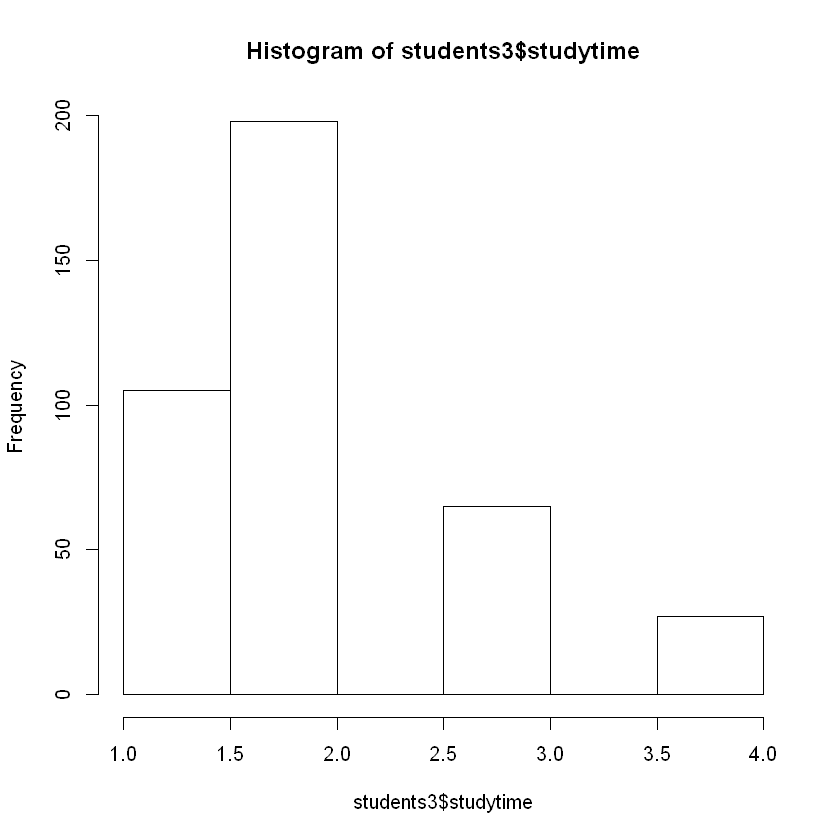

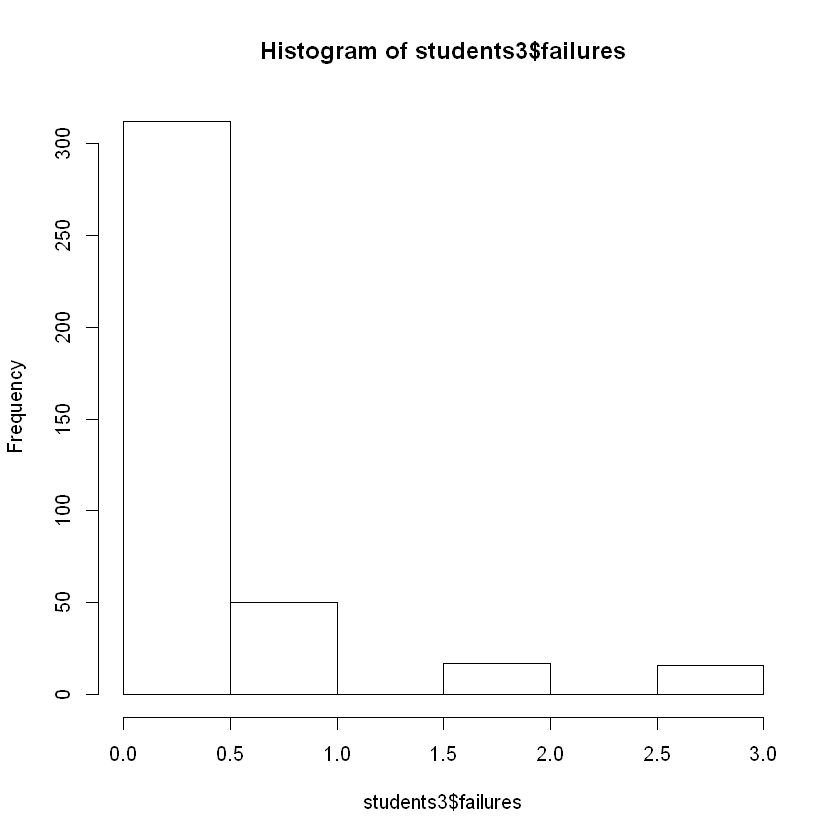

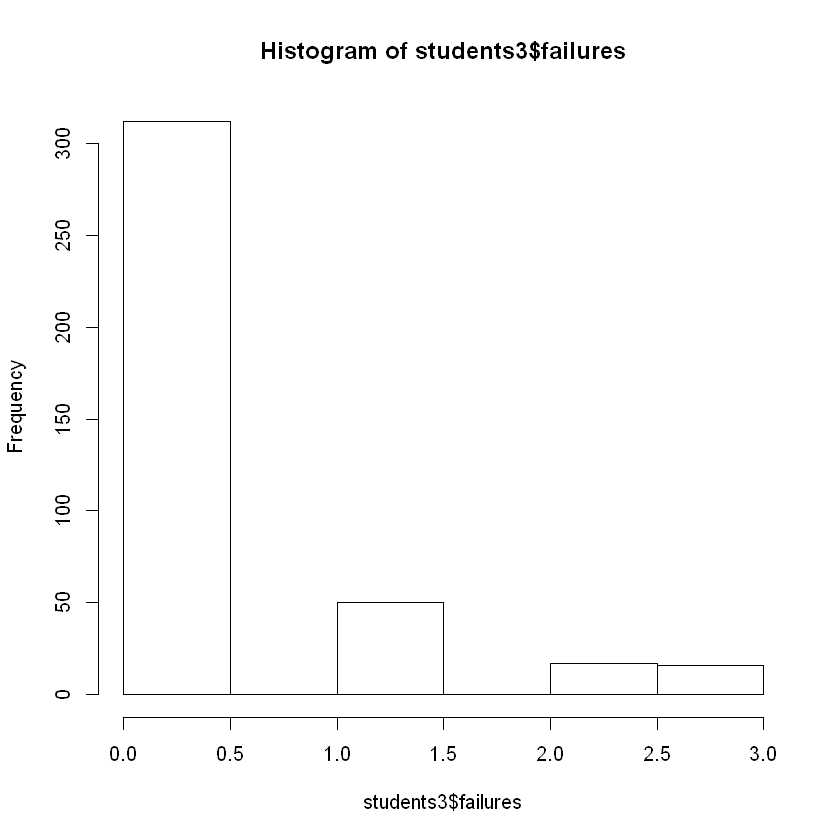

In [45]:
# Look at a summary() of students3
summary(students3)

# View a histogram of the studytime variable
hist(students3$studytime)

# View a histogram of the failures variable
hist(students3$failures)

# View a histogram of absences, but force zeros to be bucketed to the right of zero
hist(students3$failures, right=FALSE)

### Another look at strange values

Another useful way of looking at strange values is with boxplots. Simply put, boxplots draw a box around the middle 50% of values for a given variable, with a bolded horizontal line drawn at the median. Values that fall far from the bulk of the data points (i.e. outliers) are denoted by open circles. 

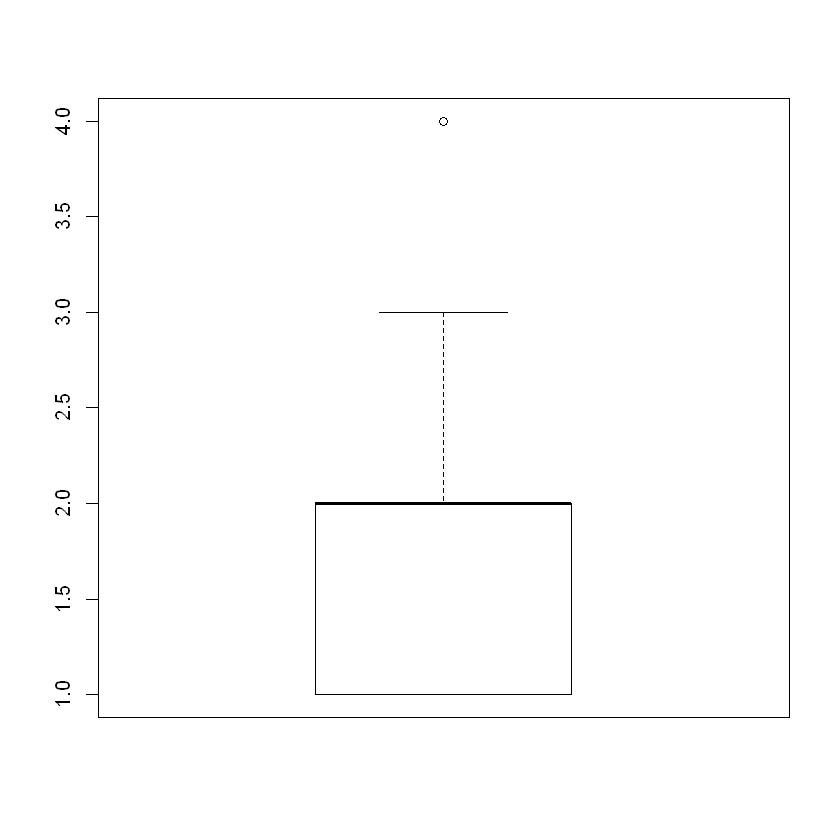

In [47]:
boxplot(students3$studytime)